<a href="https://phelma-sicom-3pmpols6-cours-bayartpi-a42652bdaf1952804ff1824b4d.gricad-pages.univ-grenoble-alpes.fr" target="_blank">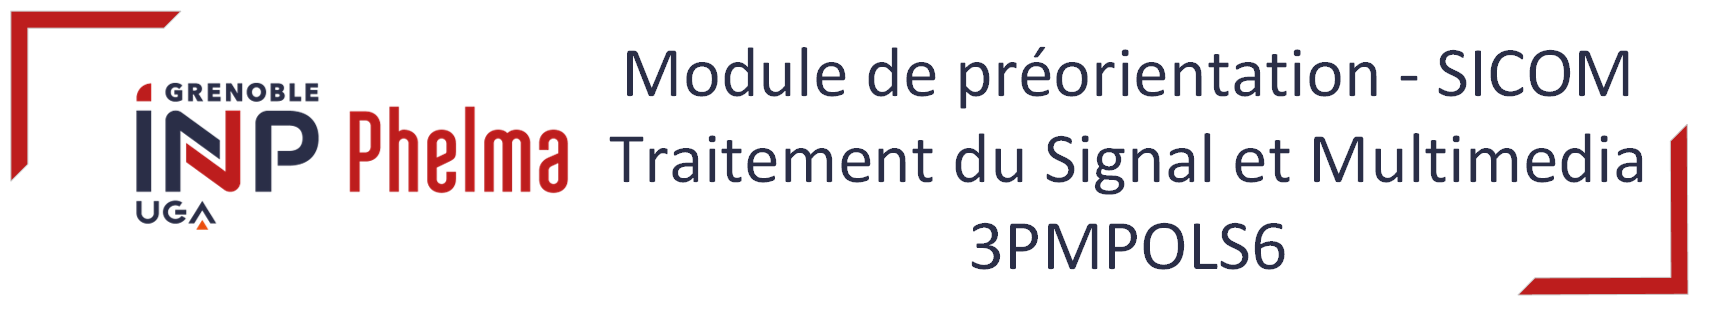</a>

# TD 2 - Partie 3

**Objectifs de ce TD : sur des données réelles (NMIST et Fashion NMIST)**

- 🖼️ Comprendre les **réseaux de neurones de convolution (CNN)**
- 🧠 Comprendre les différences de fonctionnement entre les réseaux de neurones **denses** et de **convolution**
___

## Préparation : mise en place de l'environnement de travail du TD

**Importation des bibliothèques** Python nécessaires pour le TD

💻 *Exécuter le code de la cellule*

In [ ]:
## Importation des bibliothèques Python nécessaires au TD
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

from PIL import Image

import matplotlib.pyplot as plt

import random

import ipywidgets as widgets

from IPython.display import display
from IPython.display import Markdown as md

import plotly.graph_objects as go

In [ ]:
def create_new_dataset(dataset, rand=True, zero=True):
    """
    Fonction pour générer des nouvelles données
    à partir du jeu de données MNIST, Fashion MNIST
    """
    if rand is None or zero is None:
        raise ValueError("Les paramètres rand et zero doivent être définis")
    new_size = (56, 56)
    positions = ["haut_gauche", "haut_droite", "bas_gauche", "bas_droite"]
    new_dataset = list()
    for image in dataset:
        if zero is True:
            new_image = np.zeros((56, 56))
        else:
            new_image = np.random.rand(56, 56)
        if rand is True:
            pos_x = random.randint(0, 56-28)
            pos_y = random.randint(0, 56-28)
            new_image[pos_x:pos_x+28, pos_y:pos_y+28] = image.reshape(28, 28)
        else:
            pos = random.choice(positions)
            if pos=="haut_gauche":
                new_image[0:28, 0:28] = image.reshape(28, 28)
            elif pos=="haut_droite":
                new_image[0:28, 28:] = image.reshape(28, 28)
            elif pos=="bas_gauche":
                new_image[28:, 0:28] = image.reshape(28, 28)
            elif pos=="bas_droite":
                new_image[28:, 28:] = image.reshape(28, 28)
        new_dataset.append(new_image.reshape(56, 56, 1))
    new_dataset = np.array(new_dataset)
    return new_dataset

## Manipulation 1 : création de bases de données à partir des données NMIST ou Fashion NMIST

Pour **complexifier** le travail d'apprentissage des réseaux de neurones, nous allons **créer 4 nouveaux jeu de données** à partir du jeu **Fashion MNIST**. Au total, nous allons travailler avec 5 jeu de données :
- **JEU DE DONNEES N°1** : Le jeu de données Fashion MNIST
- **JEU DE DONNEES N°2** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine positionné à un des **4 coins de l'image** sur **fond noir**
- **JEU DE DONNEES N°3** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine positionné à un des **4 coins de l'image** sur **fond bruité**
- **JEU DE DONNEES N°4** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine **positionné aléatoirement** sur **fond noir**
- **JEU DE DONNEES N°5** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine **positionné aléatoirement** sur **fond bruité**

Les différents jeux de données sont créés grâce aux deux paramètres `rand` et `zero` de la fonction `create_new_dataset` :

- `rand` : positionne l'image aléatoirement si la valeur vaut `True` et à un des 4 coins de l'image si la valeur vaut `False`
- `zero` : rempli le fond de l'image en noir si la valeur vaut `True` et avec du bruit si la valeur vaut `False`

💻 *Exécuter le code et tester les 4 configurations en changeant les paramètres de la fonction `create_new_dataset`* 

In [ ]:
randDatabase=False
zeroDatabase=True


num_classes = 10
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape[0], "Images d'entrainement")
print(x_test.shape[0], "Images de test")
print("Dimensions d'une image : ", x_train[0].shape)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
new_x_train = create_new_dataset(x_train, rand=randDatabase, zero=zeroDatabase)
names = np.array([
    "T-shirt/top", "Pantalon", "Pull", "Robe", "Manteau",
    "Sandale", "Chemise", "Basket", "Sac", "Bottine",
])
rnd_value = random.randint(0, 60000)
print("Etiquette : ", names[y_train[rnd_value].argmax()])
plt.imshow(new_x_train[rnd_value], cmap='gray')
plt.show()

💻 *Exécuter le code pour la création des réseaux de neurones*

In [ ]:
def fcn(nb_neurons=180, input_shape=(28, 28, 1), num_classes=10):
    """
    Création du réseau de neurones complétement connecté
    """
    print("Réseau dense")
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Flatten(),
            layers.Dense(nb_neurons, activation="relu"),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    print(model.summary())
    return model

def cnn(nb_neurons_1=100, nb_neurons_2=70, input_shape=(28, 28, 1), num_classes=10):
    """
    Création du réseau de neurones de convolution
    """
    print("Réseau CNN")
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(nb_neurons_1, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(nb_neurons_2, kernel_size=(3, 3), activation="relu"),
            layers.Flatten(),
            layers.Dropout(.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    print(model.summary())
    return model

def train_evaluate(model, x_train, y_train, x_test, y_test):
    """
    Entrainement et évaluation du modèle
    """
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(x_train, y_train, batch_size=128, epochs=3, validation_split=0.1)
    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return score[1]

## Manipulation 2 : analyse de l'apprentissage des réseaux de convolution et complétement connectés sur des images de complexités croissantes


L'objectif de cette partie est de **comparer les performances** des deux modèles (modèle dense et de convolution) sur les **5 jeux de données**.

Les temps d'entrainement des réseaux de convolution étant assez long sur CPU, vous n'allez entrainer des modèles que sur **DEUX** jeux de données :
- **JEU DE DONNEES N°1** : Le jeu de données Fashion MNIST (pour tous les groupes)

Et **UN** jeu de données parmi les 4 suivants :
- **JEU DE DONNEES N°2** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine positionné à un des **4 coins de l'image** sur **fond noir**
- **JEU DE DONNEES N°3** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine positionné à un des **4 coins de l'image** sur **fond bruité**
- **JEU DE DONNEES N°4** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine **positionné aléatoirement** sur **fond noir**
- **JEU DE DONNEES N°5** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine **positionné aléatoirement** sur **fond bruité**

🎲 Il y a de nombreux processus aléatoires dans l'entrainement du modèle (initialisation des poids, création des batch de données...), il est donc normal de **ne pas trouver exactement** les mêmes résultats que les autres étudiants pour un même modèle et un même jeu de données. Néanmoins, les ordres de grandeurs doivent être cohérents.

💻 *Au fur et à mesure de l'entrainement des différents modèles, ajouter les résultats des métriques d'**accuracy** dans les variables. Le code suivant génére un tableau formaté en markdown* 

In [ ]:
test_acc_fcn_1 = 0 # A REMPLIR AVEC L'ACCURACY DU MODELE DENSE SUR LE JEU DE DONNES 1
test_acc_cnn_1 = 0 # A REMPLIR AVEC L'ACCURACY DU MODELE DE CONVOLUTION SUR LE JEU DE DONNES 1
temps_fcn_1 = 0 # A REMPLIR AVEC LE TEMPS D'ENTRAINEMENT SUR LES 3 EPOQUES DU MODELE DENSE SUR LE JEU DE DONNES 1
temps_cnn_1 = 0 # A REMPLIR AVEC LE TEMPS D'ENTRAINEMENT SUR LES 3 EPOQUES DU MODELE DE CONVOLUTION SUR LE JEU DE DONNES 1
test_acc_fcn_2 = 0 # A REMPLIR AVEC L'ACCURACY DU MODELE DENSE SUR LE JEU DE DONNES 2
test_acc_cnn_2 = 0 # A REMPLIR AVEC L'ACCURACY DU MODELE DE CONVOLUTION SUR LE JEU DE DONNES 2
temps_fcn_2 = 0 # A REMPLIR AVEC LE TEMPS D'ENTRAINEMENT SUR LES 3 EPOQUES DU MODELE DENSE SUR LE JEU DE DONNES 2
temps_cnn_2 = 0 # A REMPLIR AVEC LE TEMPS D'ENTRAINEMENT SUR LES 3 EPOQUES DU MODELE DE CONVOLUTION SUR LE JEU DE DONNES 2
test_acc_fcn_3 = 0 # A REMPLIR AVEC L'ACCURACY DU MODELE DENSE SUR LE JEU DE DONNES 3
test_acc_cnn_3 = 0 # A REMPLIR AVEC L'ACCURACY DU MODELE DE CONVOLUTION SUR LE JEU DE DONNES 3
temps_fcn_3 = 0 # A REMPLIR AVEC LE TEMPS D'ENTRAINEMENT SUR LES 3 EPOQUES DU MODELE DENSE SUR LE JEU DE DONNES 3
temps_cnn_3 = 0 # A REMPLIR AVEC LE TEMPS D'ENTRAINEMENT SUR LES 3 EPOQUES DU MODELE DE CONVOLUTION SUR LE JEU DE DONNES 3
test_acc_fcn_4 = 0 # A REMPLIR AVEC L'ACCURACY DU MODELE DENSE SUR LE JEU DE DONNES 4
test_acc_cnn_4 = 0 # A REMPLIR AVEC L'ACCURACY DU MODELE DE CONVOLUTION SUR LE JEU DE DONNES 4
temps_fcn_4 = 0 # A REMPLIR AVEC LE TEMPS D'ENTRAINEMENT SUR LES 3 EPOQUES DU MODELE DENSE SUR LE JEU DE DONNES 4
temps_cnn_4 = 0 # A REMPLIR AVEC LE TEMPS D'ENTRAINEMENT SUR LES 3 EPOQUES DU MODELE DE CONVOLUTION SUR LE JEU DE DONNES 4
test_acc_fcn_5 = 0 # A REMPLIR AVEC L'ACCURACY DU MODELE DENSE SUR LE JEU DE DONNES 5
test_acc_cnn_5 = 0 # A REMPLIR AVEC L'ACCURACY DU MODELE DE CONVOLUTION SUR LE JEU DE DONNES 5
temps_fcn_5 = 0 # A REMPLIR AVEC LE TEMPS D'ENTRAINEMENT SUR LES 3 EPOQUES DU MODELE DENSE SUR LE JEU DE DONNES 5
temps_cnn_5 = 0 # A REMPLIR AVEC LE TEMPS D'ENTRAINEMENT SUR LES 3 EPOQUES DU MODELE DE CONVOLUTION SUR LE JEU DE DONNES 5
# Affichage du tableau
md(f"""
| Nom du jeu de données  | Accuracy réseau dense | Accuracy réseau de convolution | Temps entrainement réseau dense (en s) | Temps entrainement réseau de convolution (en s) |
| -------- | ------- | ------- | ------- | ------- |
| JEU DE DONNEES N°1 : Fashion MNIST  | {round(test_acc_fcn_1, 3)} | {round(test_acc_cnn_1, 3)} | {round(temps_fcn_1, 3)} | {round(temps_cnn_1, 3)} |
| JEU DE DONNEES N°2 : 4 coins - fond noir  | {round(test_acc_fcn_2, 3)} | {round(test_acc_cnn_2, 3)} | {round(temps_fcn_2, 3)} | {round(temps_cnn_2, 3)} |
| JEU DE DONNEES N°3 : 4 coins - fond aleatoire  | {round(test_acc_fcn_3, 3)} | {round(test_acc_cnn_3, 3)} | {round(temps_fcn_3, 3)} | {round(temps_cnn_3, 3)} |
| JEU DE DONNEES N°4 : position aléatoire - fond noir  | {round(test_acc_fcn_4, 3)} | {round(test_acc_cnn_4, 3)} | {round(temps_fcn_4, 3)} | {round(temps_cnn_4, 3)} |
| JEU DE DONNEES N°5 : position aléatoire - fond aleatoire  | {round(test_acc_fcn_5, 3)} | {round(test_acc_cnn_5, 3)} | {round(temps_fcn_5, 3)} | {round(temps_cnn_5, 3)} |
""")

💻 Une fois le tableau complétement rempli, analyser les résultats

### Entrainement et évaluation des 2 modèles avec le jeu d'images Fashion MNIST

L'objectif de cette partie est de **comparer** les performances en terme d'**accuracy** sur le jeu de données **Fashion MNIST** des deux modèles de réseaux de neurones : un **réseau dense** et un **réseau de convolution**.

💻 *Exécuter le code et reporter les résultats de l'accuracy sur le jeu de données de test dans le tableau de synthèse des résultats pour le modèle dense*

In [ ]:
# Entrainement du modèle dense sur le jeu de données Fashion MNIST
model_fcn_Reference = fcn()
test_acc_fcn_Reference = train_evaluate(model_fcn_Reference, x_train, y_train, x_test, y_test)

💻 *Exécuter le code et reporter les résultats de l'accuracy sur le jeu de données de test dans le tableau de synthèse des résultats pour le modèle de convolution*

In [ ]:
# Entrainement du modèle de convolution sur le jeu de données Fashion MNIST
model_cnn_Reference = cnn()
test_acc_cnn_Reference = train_evaluate(model_cnn_Reference, x_train, y_train, x_test, y_test)

## Manipulation 3 : comparaison sur les nouvelles bases de données


💻 *Comparer les résultats des deux modèles (dense et de convolution) en termes d'accuracy mais aussi de temps d'entrainement*

### Entrainement et évaluation des 2 modèles avec le jeu d'images Fashion MNIST modifié

L'objectif de cette partie est de **comparer** les performances en terme d'**accuracy** sur le jeu de données **Fashion MNIST modifié** des deux modèles de réseaux de neurones : un **réseau dense** et un **réseau de convolution**. Il faut choisir un des 4 jeux de données suivant :

- **JEU DE DONNEES N°2** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine positionné à un des **4 coins de l'image** sur **fond noir**
- **JEU DE DONNEES N°3** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine positionné à un des **4 coins de l'image** sur **fond bruité**
- **JEU DE DONNEES N°4** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine **positionné aléatoirement** sur **fond noir**
- **JEU DE DONNEES N°5** : Le jeu de données Fashion MNIST recréé avec des données **4 fois plus grande** en dimension **56x56x1** avec l'image d'origine **positionné aléatoirement** sur **fond bruité**

💻 *Modifier les paramètres `rand` et `zero` de la fonction `create_new_dataset` pour générer le jeu de données choisi (⚠️ les valeurs des paramètres doivent être les mêmes pour le jeu d'entrainement et de test)*

In [ ]:
# Création des nouveaux jeux de données

randDatabase=True # Paramètres rand à définir
zeroDatabase=False # Paramètres zero à définir

new_x_train = create_new_dataset(x_train, rand=randDatabase, zero=zeroDatabase) 
new_x_test  = create_new_dataset(x_test, rand=randDatabase, zero=zeroDatabase)

💻 *Exécuter le code et vérifier que le bon jeu de données a été créé*

In [ ]:
names = np.array([
    "T-shirt/top", "Pantalon", "Pull", "Robe", "Manteau",
    "Sandale", "Chemise", "Basket", "Sac", "Bottine",
])
rnd_value = random.randint(0, 60000)
print("Etiquette : ", names[y_train[rnd_value].argmax()])
plt.imshow(new_x_train[rnd_value], cmap='gray')
plt.show()

### Réseau complètement connecté
💻 *Exécuter le code et reporter les résultats de l'accuracy sur le jeu de données de test dans le tableau de synthèse des résultats pour le modèle dense*

In [ ]:
# Entrainement du modèle dense sur le jeu de données Fashion MNIST
model_fcn_New = fcn(nb_neurons=45, input_shape=(56, 56, 1))
test_acc_fcn_New = train_evaluate(model_fcn_New, new_x_train, y_train, new_x_test, y_test)

### Réseau convolutif
💻 *Exécuter le code et reporter les résultats de l'accuracy sur le jeu de données de test dans le tableau de synthèse des résultats pour le modèle de convolution*

In [ ]:
# Entrainement du modèle de convolution sur le jeu de données Fashion MNIST modifié
model_cnn_New = cnn(nb_neurons_1=50, nb_neurons_2=21, input_shape=(56, 56, 1))
test_acc_cnn_New = train_evaluate(model_cnn_New, new_x_train, y_train, new_x_test, y_test)

💻 *Comparer les résultats des deux modèles (dense et de convolution) en termes d'accuracy mais aussi de temps d'entrainement*

<a href="https://phelma.grenoble-inp.fr" target="_blank">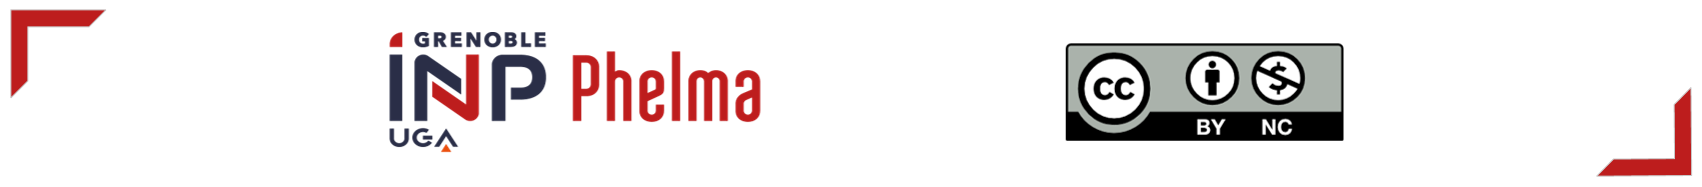</a>